# EDA for target variable and the following train-data columns:
"legal_ownership_status","count_families","has_secondary_use","has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"

## Summary from EDA:
### Columns of train-data
    - No NAs.
    - Ready to use "count_families","has_secondary_use","has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"
    - legal_ownership has to be encoded.

### Target data
    - Highly imbalanced! MIght need up/downsamlping
        "1": 0.09640791861888481 %
        "2": 0.5689118614280068 %
        "3": 0.33468021995310837 %

##### Steps for EDA:
0. Perform a df.head()
1. Make sure you understand every feature.
2. View df.shape and df.info()
3. Look for NA with df.isna().sum()/df.shape[0]
4. Do df.describe(). Look for unique values.
5. Create a boxplot for every column.
6. Do a heatmap.
7. Look for duplicates.
8. If classification: Look for imbalanced target variables!

#### Train variables

In [1]:
import pandas as pd
import numpy as np
df_or = pd.read_csv("../data/raw/train_values.csv")
df = df_or.loc[:,["legal_ownership_status","count_families","has_secondary_use","has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"]]

In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   legal_ownership_status         260601 non-null  object
 1   count_families                 260601 non-null  int64 
 2   has_secondary_use              260601 non-null  int64 
 3   has_secondary_use_agriculture  260601 non-null  int64 
 4   has_secondary_use_hotel        260601 non-null  int64 
 5   has_secondary_use_rental       260601 non-null  int64 
 6   has_secondary_use_institution  260601 non-null  int64 
 7   has_secondary_use_school       260601 non-null  int64 
 8   has_secondary_use_industry     260601 non-null  int64 
 9   has_secondary_use_health_post  260601 non-null  int64 
 10  has_secondary_use_gov_office   260601 non-null  int64 
 11  has_secondary_use_use_police   260601 non-null  int64 
 12  has_secondary_use_other        260601 non-nu

In [3]:
df.isna().any()

legal_ownership_status           False
count_families                   False
has_secondary_use                False
has_secondary_use_agriculture    False
has_secondary_use_hotel          False
has_secondary_use_rental         False
has_secondary_use_institution    False
has_secondary_use_school         False
has_secondary_use_industry       False
has_secondary_use_health_post    False
has_secondary_use_gov_office     False
has_secondary_use_use_police     False
has_secondary_use_other          False
dtype: bool

In [4]:
df.describe()

,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cols = df.drop(columns=["count_families","legal_ownership_status"]).columns

for i in cols:
    print(df.loc[:,i].sum()/df.shape[0])

0.11187984696912137
0.06437811059819418
0.03362611808857219
0.008100506137735466
0.0009401345351706249
0.0003607046788001581
0.0010706021849494053
0.00018802690703412496
0.00014581678504687243
8.825752779152804e-05
0.005118936611908626


In [6]:
df.drop(columns=["count_families","legal_ownership_status"]).columns

Index(['has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [7]:
for i in df.columns:
    print(df[i].unique())

['v' 'a' 'r' 'w']
[1 0 2 3 4 5 6 7 9 8]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


<Axes: ylabel='Frequency'>

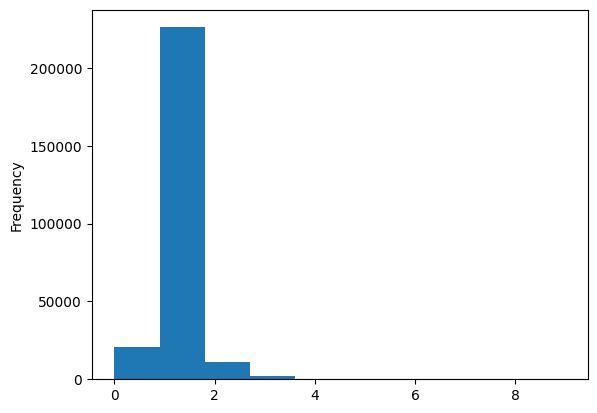

In [8]:
df.loc[:,"count_families"].plot(kind="hist")


<Axes: xlabel='legal_ownership_status'>

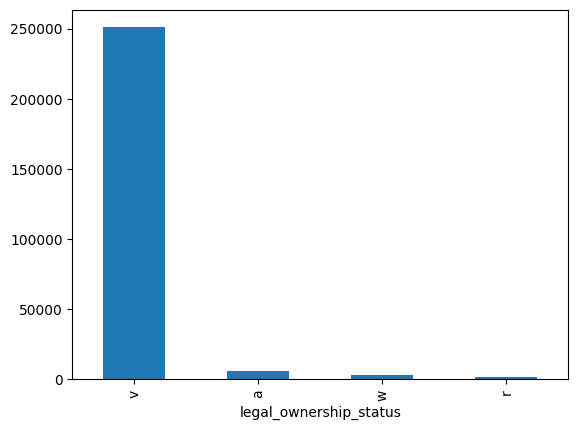

In [9]:
df.loc[:,"legal_ownership_status"].value_counts().plot(kind="bar")

#### Target variable

In [10]:
df_target = pd.read_csv("../data/raw/train_labels.csv")

0.09640791861888481
0.5689118614280068
0.33468021995310837


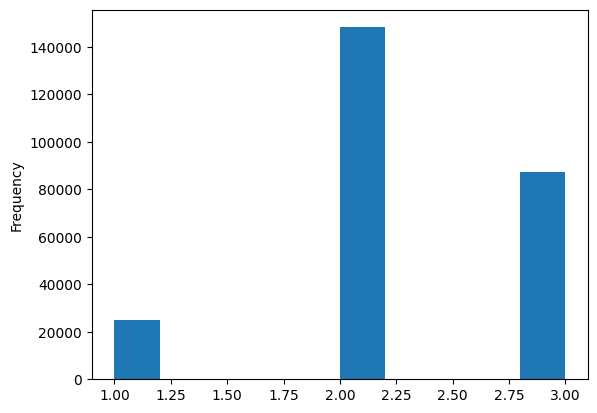

In [11]:
df_target.loc[:,"damage_grade"].plot(kind="hist")

# Percent of target variables 1,2,3
print(df_target.loc[df_target.loc[:,"damage_grade"] == 1,"damage_grade"].count()/df_target.shape[0])
print(df_target.loc[df_target.loc[:,"damage_grade"] == 2,"damage_grade"].count()/df_target.shape[0])
print(df_target.loc[df_target.loc[:,"damage_grade"] == 3,"damage_grade"].count()/df_target.shape[0])